# Titanic Disaster Survival

## Step 1: import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: load the data

In [2]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

### Survived is our target variable

In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 3: Data Analysis

## visually analyzing the data 

## Find out how many survived vs died using countplot

<Axes: xlabel='Survived', ylabel='count'>

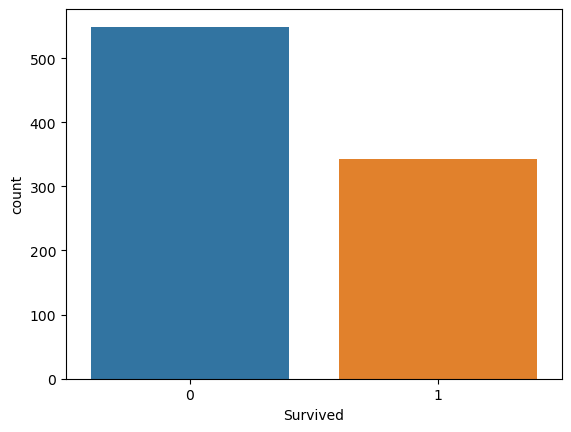

In [9]:
sns.countplot(x = 'Survived', data = titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

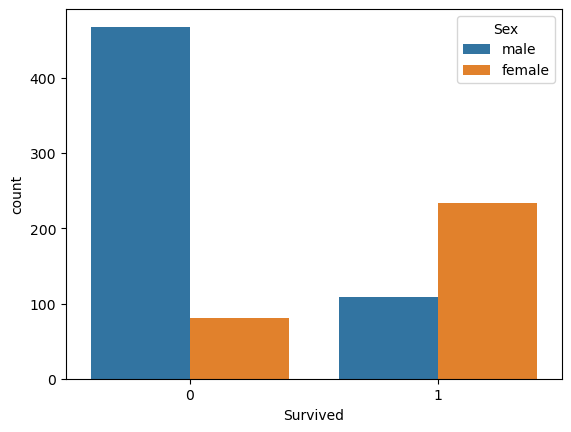

In [10]:
sns.countplot(x = 'Survived', data = titanic_data, hue = 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

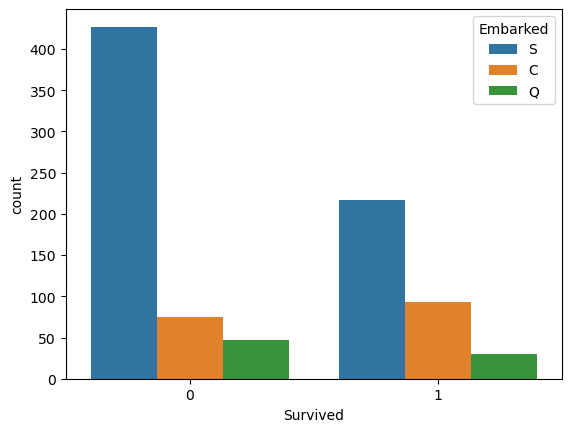

In [11]:
sns.countplot(x='Survived', data = titanic_data, hue = 'Embarked')

In [12]:
## checking the null value

In [13]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
## visualize null values

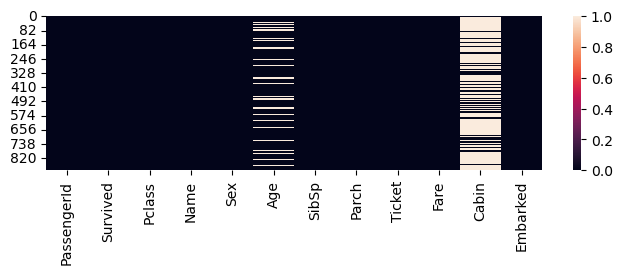

In [15]:
plt.figure(figsize=(8,2))
sns.heatmap(titanic_data.isnull())
plt.show()

In [16]:
## find the % of null values in column Age and Cabin

In [17]:
round((titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100,2)

19.87

In [18]:
round((titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100,2)

77.1

In [19]:
## find the distribution of the Age column

/Users/yashpatel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


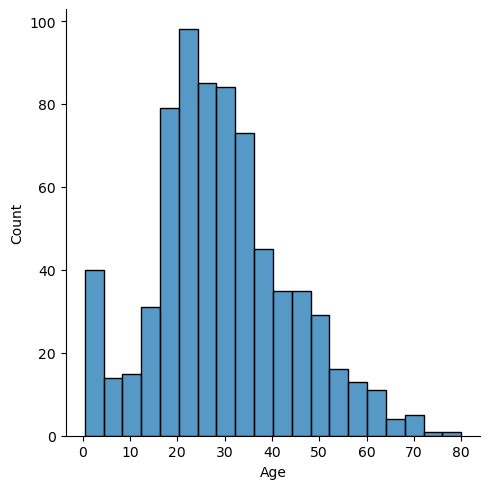

In [23]:
sns.displot(x = 'Age', data = titanic_data)

# Data Cleaning

## fill the missing value

we will fill the missing values for age. In order to fill missing value we will use fillna method.
For now we will fill the missing value by taking the average of all age.

In [24]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True) 

In [25]:
## verify the null values

In [26]:
titanic_data['Age'].isnull().sum()

0

<Axes: >

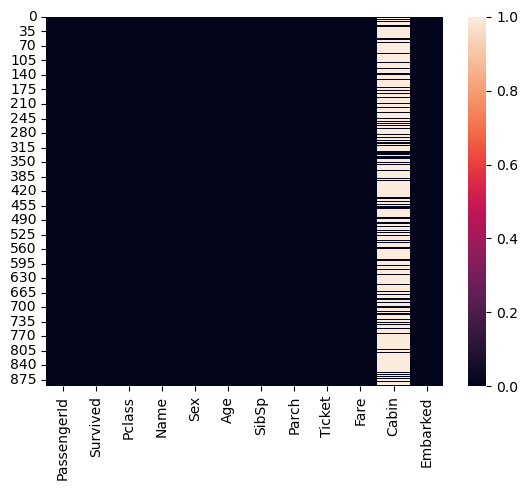

In [27]:
sns.heatmap(titanic_data.isna())

In [28]:
## we will drop the cabin column

In [29]:
titanic_data.drop('Cabin', axis = 1, inplace = True)

In [30]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [31]:
titanic_data.drop('Name', axis = 1, inplace = True)

In [32]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [33]:
## now Ticket Embarked are not the important data in our analysis, hence we will drop this data. 
## we will convert the sex column into numeric column as it is an important one

In [37]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first = True)

In [38]:
titanic_data['Gender'] = gender

In [39]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,male,35.0,0,0,373450,8.0500,S,True


In [41]:
titanic_data.drop(['Sex', 'Ticket','Embarked'], axis = 1, inplace = True)

In [42]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender'],
      dtype='object')

In [43]:
titanic_data['Gender'] = titanic_data['Gender'].astype(int)

In [45]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [46]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

In [48]:
X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = titanic_data['Survived']

In [49]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,1


In [50]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Step 5: Data Modelling

## building model using logistics regression

In [51]:
## import train test split method to split the dataset into training and testing dataset

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [53]:
## import logistic model

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [56]:
lr.fit(X_train,y_train)

/Users/yashpatel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
## prediction

In [58]:
predict = lr.predict(X_test)

## Testing

### see how our model is performing

In [59]:
## confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix

In [63]:
pd.DataFrame(confusion_matrix(y_test,predict), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,133,24
Actual Yes,34,77


In [64]:
## import classification report 

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.76      0.69      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

